# Saravanan, Karthik Sundaram - Homework 1

### Submission
Replace Last Name, First Name above with your name. When you complete this homework, please click "File" -> "Print Preview". Print the resulting browser tab (double check that all code / markdown is there and that plots are visible). Submit a physical copy of your homework **in class on Wednesday 30th January**.

### R versus Python
You may complete this homework in either R or python. The current notebook is written in R. If you are completing your homework in R, you can simply modify this notebook with your answers. If you are completing your homework in python, initiate a Jupyter python notebook and write your answers there.

### Background Reading for Problems
- Section 22.1 - 22.5 in "Numerical Analysis" by Lange.

## Question 1: Inverse Method for geometric random variates

1. Using the inverse method and the language $Unif[0,1]$ generator (runif in R, numpy.random.uniform in python), write a function to generate random variates from a geometric distribution with probability of success $p$. Both $p$ and the number of random variates should be arguments to your function. There are multiple ways of defining the geometric distribution, here please use the definition that it is the number of *failures* until the first success.
2. For some particular $p$ of your choosing, make a plot of the proportion of random variates taking each value and plot the true geometric probability mass function on top to confirm that the generator is working.
3. Compare the speed of your geometric generator to the language generator (rgeom in R, numpy.random.geometric in python). Try to make your generator computationally competitive with the built in generator by avoiding for loops and other slow code.
4. How do you think your method would compare to an approach that generates a sequence of random trials with probability $p$ of success until the first success and then records the number of failures until the first success? Why?

# Q .1.1

In [1]:
import numpy as np
from math import ceil
%matplotlib inline
import matplotlib.pyplot as plt
plt.style.use('seaborn-white')
# As integral f(x)=1 


def rngfn(p,n):
    U = np.random.uniform(size=n)
    X = np.log(U)/np.log(1-p)
    X = np.ceil(X-1)
    return(X) # shift because number of trials before first success instead of number of failures

X = rngfn(0.5,1000)

X

array([ 2., -0., -0., -0., -0.,  3.,  1., -0.,  2., -0.,  1., -0.,  1.,
       -0., -0., -0.,  2., -0.,  1.,  1.,  2., -0.,  6.,  1.,  4., -0.,
        1., -0.,  1.,  1.,  1.,  1.,  5.,  1.,  1., -0.,  1., -0.,  1.,
       -0.,  1., -0., -0.,  1.,  1.,  1.,  2., -0., -0., -0.,  1.,  2.,
       -0., -0.,  2.,  2., -0., -0., -0.,  2.,  3., -0., -0., -0.,  1.,
       -0.,  3., -0., -0., -0.,  1., -0., -0.,  2., -0.,  1., -0.,  1.,
       -0., -0., -0.,  1., -0., -0.,  2.,  1.,  3., -0.,  1., -0., -0.,
        1., -0., -0., -0.,  1., -0.,  1.,  2., -0., -0.,  5., -0.,  1.,
        2., -0.,  1.,  1., -0., -0.,  5., -0., -0.,  1., -0.,  1.,  3.,
        4.,  2., -0., -0., -0., -0.,  3.,  3., -0., -0., -0.,  1.,  1.,
       -0., -0.,  1., -0.,  1., -0., -0., -0.,  1.,  1., -0.,  1.,  4.,
       -0.,  3.,  1.,  1.,  5.,  3., -0.,  1.,  1., -0.,  2., -0., -0.,
        3., -0., -0.,  1., -0.,  2.,  1.,  3.,  3.,  1., -0., -0.,  1.,
        1., -0., -0., -0., -0., -0., -0., -0.,  1.,  1., -0.,  1

# Q 1.2

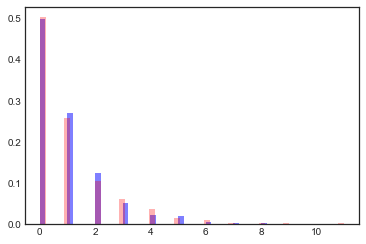

In [2]:
# kwargs = dict(histtype='stepfilled', alpha=0.3, density=True, bins=50)
# plt.hist(X, **kwargs);


weights = np.ones_like(X)/len(X)
y = np.random.geometric(p = 0.5,size = 1000)
plt.hist(X, bins=50,histtype='stepfilled', weights=weights, color="blue", alpha=0.5) 
plt.hist(y-1, bins=50,histtype='stepfilled', weights=weights, color="red", alpha=0.3) 
plt.show()

# Q1.3 (my function is a bit slower than the built-in function)

In [3]:
%%timeit
rngfn(0.5,1000)

71.4 µs ± 1.59 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


In [4]:
%%timeit
np.random.geometric(p = 0.5,size = 1000)


53.3 µs ± 2.31 µs per loop (mean ± std. dev. of 7 runs, 10000 loops each)


# Q 1.4
### It is more computationally expensive to first store the number of trials to the first success and re-iterate the array
### to count the number of failures in that than just iterating once counting just the failure to first success

## Question 2: Simulation Study of the LLN and CLT

1. Create an $n \times m$ matrix $X$ with $n=100$ and $m=1000$ and each entry $X_{ij} \sim \text{Exp}(\lambda)$ (rexp in R, numpy.random.exponential in python). Set the rate parameter to be $\lambda=0.5$ so that the mean of $X_{ij}$ is $2$. (Again, beware that there are multiple ways of parameterizing the exponential distribution and python does it differently to R). <br>If you would like some intuition for this simulation consider the following situation: we survey $100$ bus stops in a city, and at each bus stop, we measure the waiting times between each bus until the stop has been visited by $1000$ buses. The exponential distribution is often used to model waiting times (bus arrival times, next stock trade, store visits, website visits, product lifetimes etc.). In this simple simulation study, we suppose that the waiting times are the same at each bus stop and throughout the day. 
2. Compute the running mean of each row of $X$ to produce a new matrix $Y$ which is again $100 \times 1000$. Specifically the row $i$, column $k$ entry of $Y$ is
\begin{equation*}
Y_{ik} = \frac{1}{k} \sum_{j=1}^k X_{ij}
\end{equation*}
Try to avoid using nested for loops.
3. Plot each row of $Y$ (on the y-axis) against the column number (on the x-axis). This will result in 1 plot with 100 lines. Then make three histograms 1) first column of $Y$, 2) 20th column of $Y$, and 3) the last column of $Y$. Your images should roughly look like what is below. (If you want to make the results clearer and prettier, draw all histograms or density estimators on top of each other with different colors, see lecture notes from the first class [here](https://nbviewer.jupyter.org/urls/david-jones-statistics.github.io/statcomp/lectures/topic1-intro/00intro.ipynb) for how to do this with ggplot in R or [here](https://jakevdp.github.io/PythonDataScienceHandbook/04.05-histograms-and-binnings.html) for code in python from VanderPlas)
4. Take the variance of each column of $Y$ to produce a vector $\boldsymbol{u}$ giving the running variance of the means across the $n$ bus stops. Plot $1/\boldsymbol{u}_k$ (on the y-axis) against $k$ (on the x-axis), and add a line showing $k\lambda^2$, for $k=1,\dots,m$. 
5. Explain what the simulation results in parts 3 and 4 are showing.

(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/hw1_plot1.png">


(requires internet connection to view)

<img src="https://david-jones-statistics.github.io/statcomp/hw/hw1_plot2.png">


# Q2.1

In [5]:

n=100
m=1000
lambD=0.5
X = np.random.exponential(scale=1/lambD,size=n*m)
X = X.reshape(n,m)

In [6]:
np.mean(X)

1.996905246150348

In [7]:
X

array([[2.71516474, 0.45668257, 3.86222289, ..., 2.83218931, 0.92442431,
        0.68544639],
       [0.75935428, 1.17632182, 0.18212632, ..., 5.73658957, 2.21742336,
        1.9647172 ],
       [6.11702556, 0.33407954, 1.29664395, ..., 0.11096946, 0.95005272,
        9.36934453],
       ...,
       [1.60815994, 0.15648317, 2.20553126, ..., 4.06227059, 1.20937553,
        0.42054256],
       [3.19035818, 2.97313541, 3.62478152, ..., 2.07428111, 1.0395526 ,
        0.19346382],
       [5.46996059, 1.28681008, 2.8998572 , ..., 0.32848338, 0.71705973,
        0.65101439]])

# Q2.2

In [8]:

for ii in range(1,m):
    X[:,ii] = ((X[:,ii-1]*ii) + X[:,ii])/(ii+1)
    

In [9]:
X

array([[2.71516474, 1.58592365, 2.34469006, ..., 2.19387239, 2.19260167,
        2.19109452],
       [0.75935428, 0.96783805, 0.70593414, ..., 1.96985441, 1.97010223,
        1.97009684],
       [6.11702556, 3.22555255, 2.58258302, ..., 1.92969255, 1.92871193,
        1.93615257],
       ...,
       [1.60815994, 0.88232156, 1.32339146, ..., 1.9256198 , 1.92490284,
        1.92339848],
       [3.19035818, 3.0817468 , 3.26275837, ..., 1.97582897, 1.97489176,
        1.97311033],
       [5.46996059, 3.37838534, 3.21887596, ..., 2.01712363, 2.01582226,
        2.01445745]])

# Q2.3

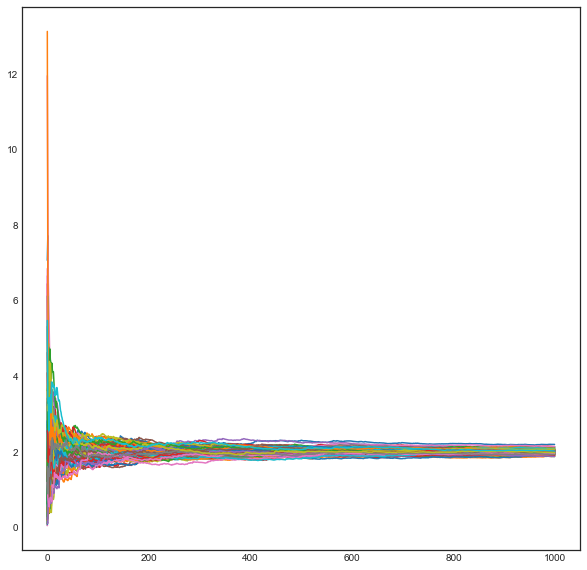

In [10]:
from matplotlib import pyplot as plt
plt.figure(figsize=(10,10))
for i in range(n):
    plt.plot(X[i,:])
plt.show()

# Q 2.3.1
# sample size = 1

(array([56., 24.,  9.,  2.,  4.,  3.,  0.,  0.,  0.,  2.]),
 array([ 0.04355699,  1.3509635 ,  2.65837002,  3.96577653,  5.27318304,
         6.58058955,  7.88799606,  9.19540258, 10.50280909, 11.8102156 ,
        13.11762211]),
 <a list of 1 Patch objects>)

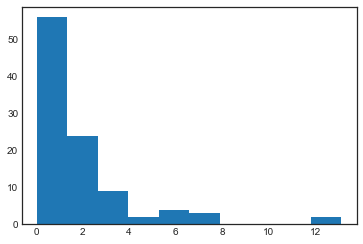

In [11]:

plt.hist(X[:,0],histtype='stepfilled')

# Q 2.3.2
# sample size = 20

(array([ 5., 11., 24., 23., 17., 12.,  4.,  1.,  2.,  1.]),
 array([1.01896606, 1.28647377, 1.55398148, 1.82148919, 2.0889969 ,
        2.35650461, 2.62401232, 2.89152003, 3.15902774, 3.42653545,
        3.69404316]),
 <a list of 1 Patch objects>)

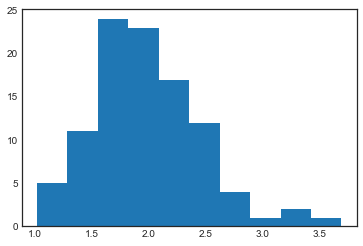

In [12]:

plt.hist(X[:,19],histtype='stepfilled')

# Q 2.3.3
# sample size = 1000

(array([ 5.,  9., 18., 20., 24., 11.,  7.,  3.,  2.,  1.]),
 array([1.87066536, 1.90270828, 1.9347512 , 1.96679411, 1.99883703,
        2.03087994, 2.06292286, 2.09496577, 2.12700869, 2.1590516 ,
        2.19109452]),
 <a list of 1 Patch objects>)

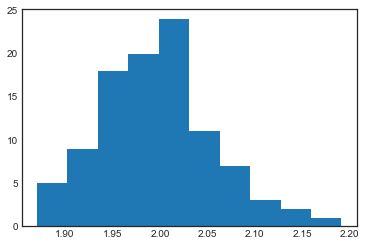

In [13]:

plt.hist(X[:,999],histtype='stepfilled')

# Q2.4

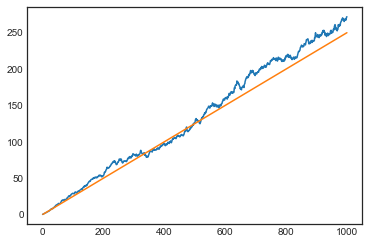

In [14]:
Yvar = X.var(axis = 0)
plt.plot(1/Yvar)
k = np.arange(1,1000)
plt.plot(k,k*lambD*lambD)

# Q2.5

### - According to Q2 part 3, part 3.1 does not follow a normal distribution, but part 3.2,3.3 follows more of  a normal distribution as the sample size increases and the mean of that distribution, centers and concentrates on 2 which is the mean of the actual distribution was actual sampled from.

### - Also, according to Q2, part 4, the reciprocal of the variance tends towards kλ^2, which is basically variance tends towards 1/kλ^2 which is basically (variance of the exponential distribution)/(sample size), where the variance of the exp distribution is 1/λ^2 (or) the inverse of variance called precision tends towards kλ^2

### Both these are indicative of the Central Limit Theorem where the mean,variance of the sample tends to  mean,variance/(sample size) as the sample sizes increases.